In [1]:
# import essential libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in csv 
df = pd.read_csv('training_11_features.csv')
df = df.dropna()
# df = df[df['ritmi'] != 0]
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(1803, 11)


,ritmi,age,sex,height,weight,heart_axis,validated_by,second_opinion,validated_by_human,pacemaker,strat_fold
0,2,29.0,1,164.0,56.0,0,0.0,0,1,0,1
1,0,59.0,0,156.0,75.0,0,0.0,0,1,0,9
2,2,84.0,1,152.0,51.0,0,0.0,0,1,0,7
3,0,79.0,0,172.0,66.0,0,0.0,0,1,0,5
4,1,67.0,0,178.0,73.0,4,0.0,0,1,0,5


In [3]:
# convert all columns' types to int64
df['age'] = df['age'].astype('int64')
df['height'] = df['height'].astype('int64')
df['weight'] = df['weight'].astype('int64')
df['validated_by'] = df['validated_by'].astype('int64')

# get info for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ritmi               1803 non-null   int64
 1   age                 1803 non-null   int64
 2   sex                 1803 non-null   int64
 3   height              1803 non-null   int64
 4   weight              1803 non-null   int64
 5   heart_axis          1803 non-null   int64
 6   validated_by        1803 non-null   int64
 7   second_opinion      1803 non-null   int64
 8   validated_by_human  1803 non-null   int64
 9   pacemaker           1803 non-null   int64
 10  strat_fold          1803 non-null   int64
dtypes: int64(11)
memory usage: 155.1 KB


In [4]:
# train-test split
X = df.drop(columns = ['ritmi','heart_axis','pacemaker','second_opinion','strat_fold','validated_by','validated_by_human'])
y = df['ritmi']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 1234)

In [5]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1352, 4)
y_train (1352,)
X_test (451, 4)
y_test (451,)


# Random Forest

In [6]:
# Plug in appropriate max_depth and random_state parameters
rf = RandomForestClassifier()
rf_param_grid = {'n_estimators': [600], 'criterion': ['entropy'], 'max_depth': [60]} #0.4615443314230772

rf_cv= GridSearchCV(rf,rf_param_grid,cv=7,n_jobs=-1)

rf_cv.fit(X_train,y_train)

print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.45563042267278153
Best Parameters: {'criterion': 'entropy', 'max_depth': 60, 'n_estimators': 600}


In [7]:
y_train_pred = rf_cv.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       461
           1       0.97      0.97      0.97       358
           2       0.98      0.97      0.98       533

    accuracy                           0.98      1352
   macro avg       0.98      0.98      0.98      1352
weighted avg       0.98      0.98      0.98      1352



In [8]:
y_pred = rf_cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.40      0.41       151
           1       0.36      0.41      0.38       116
           2       0.42      0.38      0.40       184

    accuracy                           0.40       451
   macro avg       0.39      0.40      0.40       451
weighted avg       0.40      0.40      0.40       451



<AxesSubplot:>

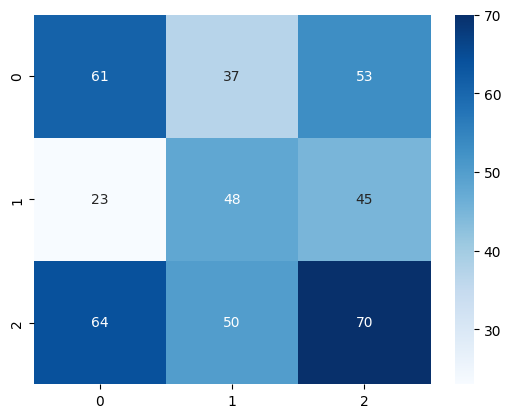

In [9]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


# K Neighbors Classifier

In [10]:
clfl2 = KNeighborsClassifier()
parameters = {'n_neighbors': [150], 'weights': ['distance'], 'metric': ['euclidean']} #0.4889326226595599

fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, refit=True, scoring="accuracy", n_jobs=-1, verbose=3)
fitmodel.fit(X_train, y_train)
print(fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END metric=euclidean, n_neighbors=150, weights=distance;, score=0.506 total time=   0.1s
[CV 3/5] END metric=euclidean, n_neighbors=150, weights=distance;, score=0.437 total time=   0.1s
[CV 4/5] END metric=euclidean, n_neighbors=150, weights=distance;, score=0.500 total time=   0.1s
[CV 5/5] END metric=euclidean, n_neighbors=150, weights=distance;, score=0.470 total time=   0.1s
[CV 1/5] END metric=euclidean, n_neighbors=150, weights=distance;, score=0.480 total time=   0.0s
KNeighborsClassifier(metric='euclidean', n_neighbors=150, weights='distance') {'metric': 'euclidean', 'n_neighbors': 150, 'weights': 'distance'} 0.47852945196118635


In [11]:
y_pred = fitmodel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       151
           1       0.42      0.50      0.45       116
           2       0.47      0.46      0.46       184

    accuracy                           0.45       451
   macro avg       0.45      0.46      0.45       451
weighted avg       0.46      0.45      0.45       451



<AxesSubplot:>

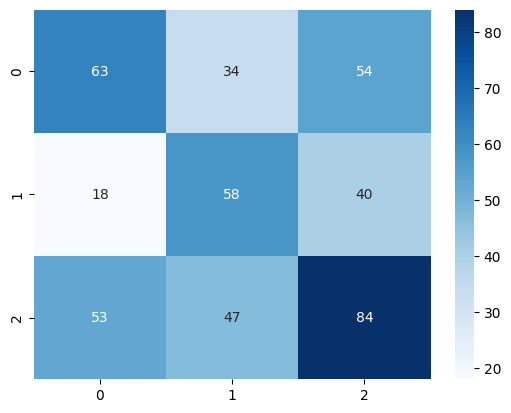

In [12]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## Deep learning models

In [13]:
#CNN
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout,MaxPooling1D,LSTM
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

In [14]:
#Reshape train and test data to (n_samples, 187, 1), where each sample is of size (187, 1)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
y_test_old = y_test.copy()

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
y_train.shape[1]

3

## 1-D Convolution

In [18]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# fit network
history_1d = model.fit(X_train, y_train, epochs=2)
# evaluate model

Epoch 1/2


2022-12-07 00:22:06.902581: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


43/43 [==============================] - 3s 4ms/step - loss: 6.0918 - accuracy: 0.3462
Epoch 2/2
43/43 [==============================] - 0s 9ms/step - loss: 3.5867 - accuracy: 0.3521


In [20]:
_, accuracy = model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 1ms/step - loss: 2.5483 - accuracy: 0.4080


In [21]:
pred_result = model.predict(X_test)
final_pred = [np.argmax(i) for i in pred_result]
print(classification_report(y_test_old,final_pred))

15/15 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.00      0.00      0.00       116
           2       0.41      1.00      0.58       184

    accuracy                           0.41       451
   macro avg       0.14      0.33      0.19       451
weighted avg       0.17      0.41      0.24       451



<AxesSubplot:>

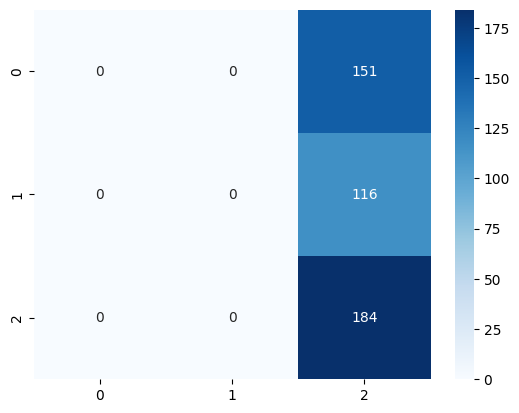

In [22]:
# confusion matrix

cm = confusion_matrix(y_test_old, final_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## LSTM models

In [23]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(100, activation="relu"))
lstm_model.add(Dense(y_train.shape[1], activation="softmax"))
lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 51,203
Trainable params: 51,203
Non-trainable params: 0
_________________________________________________________________


In [24]:
# fit network
history_lstm = lstm_model.fit(X_train, y_train, epochs=1)
# evaluate model

43/43 [==============================] - 5s 8ms/step - loss: 1.1145 - accuracy: 0.3728


In [25]:
_, accuracy = lstm_model.evaluate(X_test, y_test)

15/15 [==============================] - 1s 3ms/step - loss: 1.0757 - accuracy: 0.4080


In [26]:
lstm_pred_result = lstm_model.predict(X_test)

15/15 [==============================] - 1s 3ms/step


In [27]:
final_pred_lstm = [np.argmax(i) for i in lstm_pred_result]

In [28]:
print(classification_report(y_test_old,final_pred_lstm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.00      0.00      0.00       116
           2       0.41      1.00      0.58       184

    accuracy                           0.41       451
   macro avg       0.14      0.33      0.19       451
weighted avg       0.17      0.41      0.24       451



<AxesSubplot:>

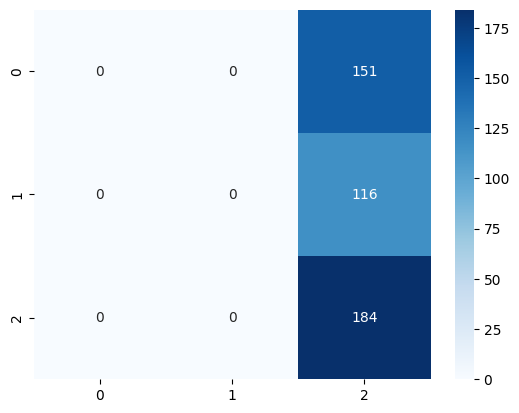

In [29]:
# confusion matrix

cm = confusion_matrix(y_test_old, final_pred_lstm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')